## K-Means Clustering
Examples

In [21]:
# Load Libraries
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [22]:
# Load Dataset
data = pd.read_csv('penguins.csv')
data.describe()
data = data.sort_values(by = 'flipper_length_mm')
print(data)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
14               34.6             21.1             -132.0       4400.0    MALE
28               37.9             18.6              172.0       3150.0  FEMALE
20               37.8             18.3              174.0       3400.0  FEMALE
122              40.2             17.0              176.0       3450.0  FEMALE
158              46.1             18.2              178.0       3250.0  FEMALE
..                ...              ...                ...          ...     ...
253              59.6             17.0              230.0       6050.0    MALE
283              54.3             15.7              231.0       5650.0    MALE
9                42.0             20.2             5000.0       4250.0    MALE
3                 NaN              NaN                NaN          NaN     NaN
339               NaN              NaN                NaN          NaN     NaN

[344 rows x 5 columns]


In [23]:
## Preprocess the data, remove the outliers
# Remove rows with NaN values
data = data.dropna()

# Convert all numeric columns to absolute values
data = data.apply(lambda x: x.abs() if pd.api.types.is_numeric_dtype(x) else x)

# Remove really large outliers
data = data[data['flipper_length_mm'] <= 4500]

data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
14,34.6,21.1,132.0,4400.0,MALE
28,37.9,18.6,172.0,3150.0,FEMALE
20,37.8,18.3,174.0,3400.0,FEMALE
122,40.2,17.0,176.0,3450.0,FEMALE
158,46.1,18.2,178.0,3250.0,FEMALE
...,...,...,...,...,...
295,48.6,16.0,230.0,5800.0,MALE
335,55.1,16.0,230.0,5850.0,MALE
285,49.8,16.8,230.0,5700.0,MALE
253,59.6,17.0,230.0,6050.0,MALE


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

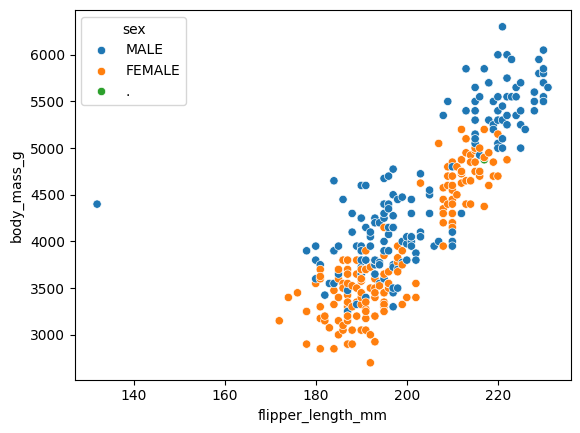

In [24]:
sns.scatterplot(data=data, x = 'flipper_length_mm', y = 'body_mass_g', hue = 'sex')


In [25]:
## Preprocess the data
data_norm = preprocessing.normalize(data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])

In [30]:
# Clustering 
kmeans = KMeans(n_clusters = 7, random_state = 0, n_init='auto')
kmeans.fit(data_norm)

KMeans(n_clusters=7, random_state=0)

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

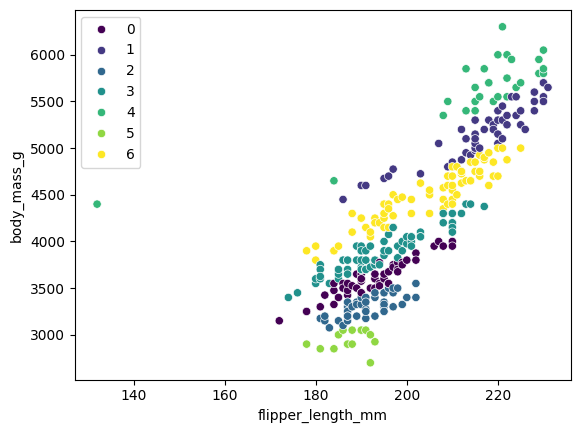

In [31]:
# Scatter plot with cluster labels
# 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'
sns.scatterplot(data=data, x = 'flipper_length_mm', y = 'body_mass_g', hue = kmeans.labels_, palette='viridis')

In [28]:
K = range(2, 12)
fits = []
score = []

silhouette_score(data_norm, kmeans.labels_, metric='euclidean')

for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(data_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(data_norm, model.labels_, metric='euclidean'))


<Axes: >

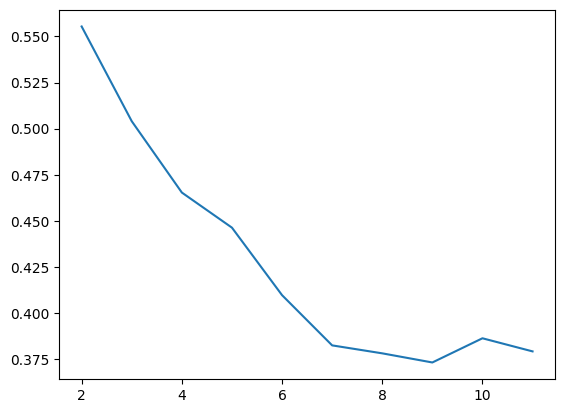

In [29]:
sns.lineplot(x = K, y = score)